**классификатор текстов CharCNN**

Евгений Борисов <esborisov@sevsu.ru>

## Данные

In [1]:
import pandas as pd
import numpy as np
import numpy.random as rng
from tqdm.notebook import tqdm
tqdm.pandas()        
pd.options.display.max_colwidth = 200 

In [2]:
ff = ['id', 'tdate', 'tmane', 'ttext', 'ttype', 'trep', 'tfav', 'tstcount', 'tfol', 'tfrien', 'listcount','unk']

data = pd.concat([
    pd.read_csv('data/positive.csv.gz',sep=';',header=None),
    pd.read_csv('data/negative.csv.gz',sep=';',header=None),
])

data.columns = ff

data = data[['id','ttext', 'ttype']]

print( 'negative:', len(data.query('ttype==-1')), '\npositive:',len(data.query('ttype==1')) )

data.sample(10)

negative: 111923 
positive: 114911


,id,ttext,ttype
2754,409041988160614400,“@valeraa_valera: @Mileno4ka_Mimi и ты тоже из этой шоблыы))))))))”\n\nМилена не шобла. Она профура недоёбаная .,1
78871,410725407680643072,"@Sailorvmina мне стало похуй сейчас, когда оно уже было сделано)",1
14487,411010170891038720,Проспала:( сижу думаю че делать. Не понимаю ничего после сна,-1
40618,413961416753025024,RT @AnQmic: Сидит тут и ломает мне детскую веру в сказки =(( http://t.co/zZrv4KTwXa,-1
10343,409285633379938304,"Короче, до 23 надо будет в душ сходить, а потом уже решу. Вы чего хотите вообще от этой жизни? :D",1
105761,411133147724521472,"@AndreySmet Ох, парни. Жду следующий эпизод всегда с нетерпением)",1
9339,410304265866215424,RT @by_lili: Я почему-то расстроилась от новости про РИА:(,-1
32266,413161346197225473,"Бессонница, ты не права, три часа сна - это мало;(",-1
81051,419724758079774720,"Смотрю фильм об отношениях, у которых нет будущего :((",-1
47761,410010516825075712,"@Sabinchik98 \nШкола мне вообще ничего не дает.\nВ основном учу по песням, статьям, сериалам.\nА, и еще по этим скринам с разных фильмов)",1


### очистка данных

In [3]:
import re

In [4]:
# применяет список замен pat к строке s
def replace_patterns(s,pat):
    if len(pat)<1: return s
    return  replace_patterns( re.sub(pat[0][0],pat[0][1],s), pat[1:] )

# нормализация текста
def string_normalizer(s):
    pat = [
      [r'[ёЁ]','е'] # замена ё для унификации
      #,[r'</?[a-z]+>',' '] # удаляем xml
      ,[r'[:;]-*[)D]',' радость ']
      ,[r'\)\)\)*',' радость ']
      ,[r'[:;]\*',' поцелуй ']
      ,[r':\(',' печаль ']
      ,[r'\(\(\(*',' печаль ']
      #,[r'\d+',' digit ']
    ]
    return replace_patterns(s,pat).strip()

In [5]:
data['ttext_'] = data['ttext'].progress_apply(string_normalizer)

  0%|          | 0/226834 [00:00<?, ?it/s]

In [6]:
import re
from nltk.tokenize import word_tokenize as nltk_tokenize_word

In [7]:
def tokenize(line): # разбиваем предложения на слова
    return    [ 
        t.lower() 
        for t in nltk_tokenize_word(line) 
        if re.match(r'[a-zа-я]+',t.lower()) # выкинуть слова не содержащие букв
        # if re.match(r'[а-я -]+',t.lower()) and len(t)>1 
        # if not( (t.lower() in stopwords) or (len(t)<3) ) 
    ] 

In [8]:
data['ttext_'] = data['ttext_'].progress_apply(tokenize)

  0%|          | 0/226834 [00:00<?, ?it/s]

In [9]:
data.sample(10)

,id,ttext,ttype,ttext_
1292,408920620370362368,@GroupIB отпускает каждого третьего киберпреступника :) https://t.co/dASTAoLYyF,1,"[groupib, отпускает, каждого, третьего, киберпреступника, радость, https]"
105832,424134045484584960,"RT @Leydennn: @_marsianishka_ ВОТ А ДЕЙСТВИТЕЛЬНО..:(\nя и не подумал..:(\nвсе, ты меня прям как просветила\nТЕПЕРЬ НЕ КУРЮ ИЗ-ЗА ДОЧЕРИ",-1,"[rt, leydennn, вот, а, действительно, печаль, я, и, не, подумал, печаль, все, ты, меня, прям, как, просветила, теперь, не, курю, из-за, дочери]"
106758,411150117350436864,"@Dasha_juk в автобусе? да) но это далеко не главное, ахахах.",1,"[dasha_juk, в, автобусе, да, но, это, далеко, не, главное, ахахах]"
17377,411215123941179392,пора бы спать...не сплю уже вторые сутки((,-1,"[пора, бы, спать, не, сплю, уже, вторые, сутки, печаль]"
34504,409767222887063552,зашел на сайт через профиль человека в твиттере и оппа . Я сцуко СТАНДАРТНЫЙ! :),1,"[зашел, на, сайт, через, профиль, человека, в, твиттере, и, оппа, я, сцуко, стандартный, радость]"
78521,410721816382930944,@I_hate_clowns_ я скажу что это кот виноват его посадят),1,"[i_hate_clowns_, я, скажу, что, это, кот, виноват, его, посадят]"
4302,409627628170391552,очень рада была тебя слышать....я очень скучаю(((,-1,"[очень, рада, была, тебя, слышать, я, очень, скучаю, печаль]"
103846,411115800334852096,"@FromYesterday33 ну, смотря с какой стороны стороны:D ты в Украине да? Хочу на украинууу",1,"[fromyesterday33, ну, смотря, с, какой, стороны, стороны, радость, ты, в, украине, да, хочу, на, украинууу]"
105172,424091183174778880,"по брызгался я папиным одеколоном значит,никто мне не соизволил нормально ответить,пахнет от меня.когда я мимо прохожу или нет:(",-1,"[по, брызгался, я, папиным, одеколоном, значит, никто, мне, не, соизволил, нормально, ответить, пахнет, от, меня.когда, я, мимо, прохожу, или, нет, печаль]"
11159,410631989356937216,в борьбе моей фобии и зубной боли постепенно побеждает зубная боль :( Скоро она таки вынудит меня пойти к стоматологу. Пе,-1,"[в, борьбе, моей, фобии, и, зубной, боли, постепенно, побеждает, зубная, боль, печаль, скоро, она, таки, вынудит, меня, пойти, к, стоматологу, пе]"


In [10]:
# максимальная длинна последовательности
seq_max_len = data['ttext_'].str.len().max() 
seq_max_len

36

In [11]:
# максимальная длинна слова
word_max_len = data['ttext_'].progress_apply(lambda s: max([ len(w) for w in s])).max()
word_max_len

  0%|          | 0/226834 [00:00<?, ?it/s]

136

In [12]:
# data[ data['ttext_'].str.len()<1 ] # пустые последовательности

In [13]:
print( 'negative:', len(data.query('ttype==-1')), '\npositive:',len(data.query('ttype==1')) )

negative: 111923 
positive: 114911


In [14]:
data = data[ data['ttext_'].str.len()>0 ].reset_index(drop=True)
print( 'negative:', len(data.query('ttype==-1')), '\npositive:',len(data.query('ttype==1')) )

negative: 111923 
positive: 114911


------

In [15]:
abc = set.union(*[ set(' '.join(s)) for s in data['ttext_'].apply(set) ])
abc = { w:n+1 for n,w in enumerate(sorted(abc)) }
# abc_len = len(abc)
# abc_len
len(abc)

197

In [16]:
# дополняем до максимальной длины
def pad_seq(s,max_len,pad_code=0):
    return [pad_code]*(max_len-len(s))+s

# заменяем символы слова на последовательность номеров символов в алфавите 
def encode_abc(w,abc=abc ): 
    return list(map(abc.get,w))

def encode_abc_bin(codes,abc_len=len(abc)):
    return [ np.eye(abc_len,dtype=np.uint8)[c] for c in codes ]

def encode_seq(s, abc=abc, seq_max_len=seq_max_len, word_max_len=word_max_len, ):
    abc_len = len(abc)+1
    zero_word = np.zeros(abc_len,dtype=np.uint8) 
    zero_seq = np.zeros([1,word_max_len,abc_len],dtype=np.uint8) 
    return np.vstack(
        pad_seq( # дополняем последовательности до единого размера
            [ 
                np.vstack(
                    pad_seq( # дополняем код слова до единого размера
                        encode_abc_bin( encode_abc(w,abc=abc), abc_len=abc_len, ) # кодируем слово
                        ,word_max_len # максимальный размер слова
                        ,pad_code=zero_word # дополняем нулями
                    )
                )[np.newaxis,:]
                for w in s # для каждого слова последовательности
            ]
            ,seq_max_len # максимальный размер последовательности
            ,pad_code=zero_seq # дополняем нулями
        )
    )[np.newaxis,:]

# [ номер примера, позиция слова в предложении, позиция символа в слове, номер символа ]

In [17]:
def get_batch(df,batch_size=10_000,shuffle=True,):
    ii = rng.permutation(len(df)) if shuffle else np.array(range(len(df)))
    for i in range(0,len(ii),batch_size):
        yield (
            np.vstack( df.iloc[ii[i:i+batch_size]]['ttext_'].apply(encode_seq).values ), 
            # строим выход нейросети (из 2 нейронов)
            np.eye(2,dtype=np.float32)[(df.iloc[ii[i:i+batch_size]]['ttype'].values+1)//2],
        )

# x,target = next( get_batch(data,batch_size=1_000) )
# x.shape, target.shape

----

In [18]:
ii = rng.permutation(len(data))
n = len(data)//10
data_train  = data.iloc[ii[:n]].reset_index(drop=True)
data_test  = data.iloc[ii[n:]].reset_index(drop=True)

In [19]:
print('train:\n')
print('\tnegative:', len(data_train.query('ttype==-1')), '\n\tpositive:',len(data_train.query('ttype==1')) )

print('test:\n')
print('\tnegative:', len(data_test.query('ttype==-1')), '\n\tpositive:',len(data_test.query('ttype==1')) )

train:

	negative: 11358 
	positive: 11325
test:

	negative: 100565 
	positive: 103586


## модель

In [20]:
# del model
# del y

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [22]:
torch.__version__

'1.10.2+cu102'

In [23]:
n_classes = 2

class Model(nn.Module):
    def __init__(self, 
                 output_dim=n_classes, # размер выхода
                ):
        super().__init__()
        
        self._conv1= nn.Conv2d(
                in_channels=seq_max_len,
                out_channels=32,
                kernel_size=(15,15)
            )
        self._linear = nn.Linear(3072, output_dim) # выходной (линейный) слой

    def forward(self,x):
        o = self._conv1(x)
        o = F.relu(o)
        # o = torch.tanh(o)
        o = F.max_pool2d(o,kernel_size=15)
        o = torch.flatten(o, start_dim=1)
        o = self._linear(o) # считаем выход сети
        o = F.softmax(o,dim=1)
        
        return o 

In [24]:
model = Model()
model

Model(
  (_conv1): Conv2d(36, 32, kernel_size=(15, 15), stride=(1, 1))
  (_linear): Linear(in_features=3072, out_features=2, bias=True)
)

In [25]:
# x,y = next( get_batch(data,batch_size=100) )
# model( torch.tensor( x, dtype=torch.float32 ) ).shape
# del x
# del y

### обучаем модель

In [26]:
# проверяем GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [27]:
model = model.to(device)

In [28]:
criterion =  nn.CrossEntropyLoss() # ф-ция потери
optimizer = torch.optim.Adam(model.parameters(), lr=.005) # метод оптимизации

In [29]:
%%time

batch_size=128
loss_history = [] # значения ф-ции потери
n_epoch = 8 # количество эпох обучения

for i in range(n_epoch): 
    print('epoch:',i+1)
    for x,y in tqdm(
            get_batch(data_train,batch_size=batch_size)
            ,total=len(data_train)//batch_size
        ): # получаем батч учебных примеров
        x_ = torch.tensor(x,dtype=torch.float32).to(device)
        y_ = torch.tensor(y,dtype=torch.float32).to(device)
        out = model.forward(x_) # считаем выход модели
        loss = criterion(y_,out ) # вычисляем значение ф-ции потери
        loss_history.append(loss.item()) # дополняем историю изменения значений ф-ции потери
        optimizer.zero_grad() # очищаем предыдущее значение градиента
        loss.backward()  # вычисляем текущее значение градиента ф-ции потери
        optimizer.step() # корректируем параметры модели
        del x_
        del y_
    torch.cuda.empty_cache()
    #acc_history.append( accuracy(data_train) ) #значение погрешности

epoch: 1


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 2


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 3


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 4


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 5


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 6


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 7


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 8


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 9


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 10


  0%|          | 0/177 [00:00<?, ?it/s]

CPU times: user 23min 21s, sys: 4min 44s, total: 28min 5s
Wall time: 22min 35s


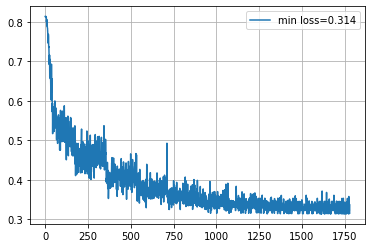

In [30]:
from matplotlib import pyplot as plt
# история изменения значений ф-ции потери
plt.plot(loss_history,label='min loss=%.3f'%(min(loss_history)))
plt.grid()
plt.legend()

## проверяем результат

In [31]:
# batch_size = 128

with torch.set_grad_enabled(False):
    o_test = np.hstack([
            np.argmax( model(torch.tensor(x,dtype=torch.float32).to(device)).cpu().numpy(),axis=1 )
            for x,_ in tqdm(
                    get_batch( data_test, batch_size=batch_size, shuffle=False)
                    ,total=len(data_test)//batch_size
                )
        ])
    
target_test = (data_test['ttype']+1)//2  

from sklearn.metrics import classification_report
print(classification_report( target_test,o_test))

  0%|          | 0/1594 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.83      0.82      0.82    100565
           1       0.82      0.84      0.83    103586

    accuracy                           0.83    204151
   macro avg       0.83      0.83      0.83    204151
weighted avg       0.83      0.83      0.83    204151



----

In [32]:
# from sklearn.metrics import accuracy_score

# def accuracy(dataset,batch_size=128):
#     with torch.set_grad_enabled(False):
#         return np.mean([
#             accuracy_score(
#                 y[:,1],
#                 np.argmax( model(torch.tensor(x,dtype=torch.float32).to(device)).cpu().numpy(),axis=1 )
#             )
#             for x,y in tqdm(
#                     get_batch( dataset, batch_size=batch_size, shuffle=False)
#                     ,total=len(dataset)//batch_size
#                 )
#         ])
        
# # acc_history = [ accuracy(data_train) ] # начальное значение погрешности

In [33]:
# acc_history

In [34]:
# acc_history

In [35]:
# # история изменения значений погрешности модели
# plt.plot(acc_history,label='max acc=%.3f'%(max(acc_history)),c='r')
# plt.grid()
# plt.legend()

In [36]:
# x,y = next( get_batch(data,batch_size=100) )
# x.shape, y.shape

In [37]:
# o = nn.Conv2d(
#         in_channels=seq_max_len,
#         out_channels=128,
#         kernel_size=(7,7)
#     )(torch.tensor(x,dtype=torch.float32))

# o = F.max_pool2d(o,kernel_size=5)

# o = nn.Conv2d(
#         in_channels=128,
#         out_channels=32,
#         kernel_size=(9,9)
#     )(o)

# o = F.max_pool2d(o,kernel_size=3)

# print(o.shape)

# o = torch.flatten(o, start_dim=1)

# o.shape

In [38]:
# max_pool2d(input, kernel_size, stride=None, padding=0, dilation=1,

In [39]:
# x,y = next( get_batch(data,batch_size=100) )
# # x.shape, y.shape
#
# o = nn.Conv2d(
#         in_channels=seq_max_len,
#         out_channels=32,
#         kernel_size=(15,15)
#     )(torch.tensor(x,dtype=torch.float32))
#
# o = F.max_pool2d(o,kernel_size=15)
#
# # o = nn.Conv2d(
# #         in_channels=128,
# #         out_channels=32,
# #         kernel_size=(9,9)
# #     )(o)
#
# # o = F.max_pool2d(o,kernel_size=3)
#
# print(o.shape)
#
# o = torch.flatten(o, start_dim=1)
#
# o.shape